In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [207]:
df.shape

(100, 4)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [209]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

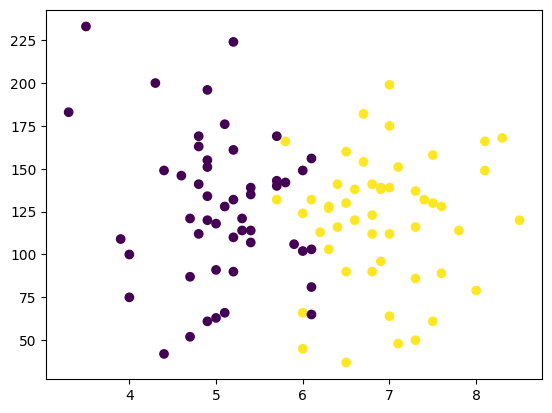

In [210]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [211]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [212]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [213]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [214]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [215]:
x_train

,cgpa,iq
84,5.7,169.0
50,3.5,233.0
54,6.4,141.0
3,7.4,132.0
77,7.3,50.0
...,...,...
82,6.5,37.0
32,7.0,139.0
65,8.1,166.0
87,5.7,132.0


In [216]:
x_test

,cgpa,iq
38,6.5,160.0
1,5.9,106.0
62,6.0,102.0
71,6.1,132.0
18,4.0,100.0
89,4.9,151.0
79,6.5,90.0
66,6.9,96.0
21,7.1,151.0
93,6.8,112.0


In [217]:
y_train

84    0
50    0
54    1
3     1
77    1
     ..
82    1
32    1
65    1
87    1
48    1
Name: placement, Length: 90, dtype: int64

In [218]:
y_test

38    1
1     0
62    0
71    1
18    0
89    0
79    1
66    1
21    1
93    1
Name: placement, dtype: int64

In [219]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [220]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-2.43327616e-01,  1.09665436e+00],
       [-2.14013344e+00,  2.65557073e+00],
       [ 3.60201510e-01,  4.14628450e-01],
       [ 1.22238598e+00,  1.95405836e-01],
       [ 1.13616753e+00, -1.80195576e+00],
       [-6.74419848e-01, -8.27633029e-01],
       [ 7.05075296e-01, -2.38167778e-02],
       [ 1.13616753e+00, -1.94323255e-01],
       [ 1.30860442e+00,  1.46689700e-01],
       [ 6.18856850e-01,  1.41330925e+00],
       [-1.57109169e-01,  1.02358016e+00],
       [ 1.01546170e-01, -1.04685564e+00],
       [ 9.63730636e-01, -1.85067190e+00],
       [ 6.18856850e-01,  7.31283337e-01],
       [-5.01982955e-01, -2.43039392e-01],
       [ 7.05075296e-01,  4.14628450e-01],
       [-1.70904121e+00, -1.19300405e+00],
       [ 8.77512189e-01, -1.46094280e+00],
       [ 1.39482287e+00,  9.79735633e-02],
       [ 1.87764617e-01, -2.67397460e-01],
       [ 3.60201510e-01, -1.94323255e-01],
       [ 1.99835199e+00,  1.07229629e+00],
       [ 8.77512189e-01,  1.82739641e+00],
       [ 2.

In [221]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.44641996,  0.87743175],
       [-0.07089072, -0.43790394],
       [ 0.01532772, -0.53533621],
       [ 0.10154617,  0.19540584],
       [-1.70904121, -0.58405235],
       [-0.93307519,  0.65820913],
       [ 0.44641996, -0.82763303],
       [ 0.79129374, -0.68148462],
       [ 0.96373064,  0.65820913],
       [ 0.7050753 , -0.29175553]])

In [222]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [223]:
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [224]:
y_pred=clf.predict(x_test)

In [225]:
y_test

38    1
1     0
62    0
71    1
18    0
89    0
79    1
66    1
21    1
93    1
Name: placement, dtype: int64

In [226]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [227]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

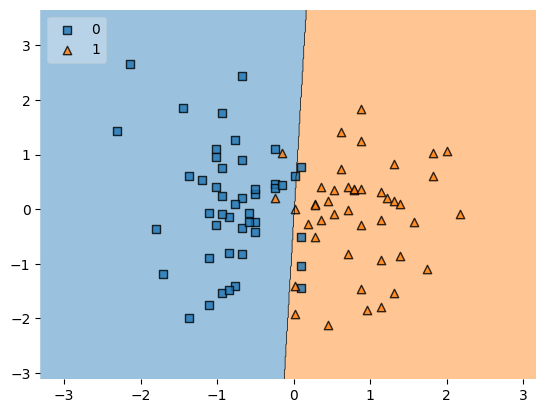

In [228]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [229]:
import pickle

In [230]:
pickle.dump(clf,open('model.pkl','wb'))